In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_validate

In [ ]:
X,y = load_diabetes(as_frame=True, return_X_y=True)
print(X)
print(y)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [ ]:
def evaluateModel(model, X, y, printRes = True):
  pred = model.predict(X)
  mse = mean_squared_error(y, pred)
  r2 = r2_score(y, pred)

  if (printRes):
    #print("Coefficients: \n", model.coef_)
    print("Coefficients: %.2f"%(np.sum(model.coef_)))
    for i in model.coef_:
      print("%8.2f "%i, end='')
    print("\nMean squared error: %.2f" % mse)
    print("Coefficient of determination: %.2f" % r2)

  return mse, r2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

# Validação Simples 
X_train, X_vali, y_train, y_vali = train_test_split(X_train,y_train, test_size=0.25)

lr = LinearRegression()
lr.fit(X_train, y_train)
evaluateModel(lr, X_vali, y_vali)
evaluateModel(lr, X_test, y_test)


Coefficients: 1154.39
   -0.72  -276.07   525.13   398.89  -649.94   348.23    -0.74   153.83   678.04   -22.25 
Mean squared error: 2126.89
Coefficient of determination: 0.61
Coefficients: 1154.39
   -0.72  -276.07   525.13   398.89  -649.94   348.23    -0.74   153.83   678.04   -22.25 
Mean squared error: 3361.09
Coefficient of determination: 0.43


(3361.086645229173, 0.4284741905250603)

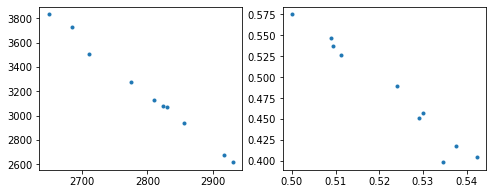

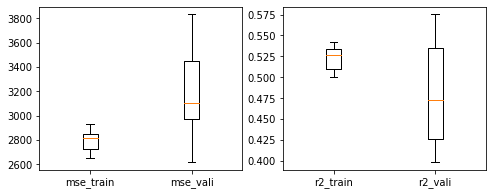

In [ ]:
mse_train = []
mse_vali  = []
r2_train  = []
r2_vali   = []


for i in range(10):
  X_train, X_vali, y_train, y_vali = train_test_split(X,y, test_size=0.20)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  mse, r2 = evaluateModel(lr, X_train, y_train, printRes = False)
  mse_train.append(mse)
  r2_train.append(r2)

  mse, r2 = evaluateModel(lr, X_vali, y_vali, printRes = False)
  mse_vali.append(mse)
  r2_vali.append(r2)

  
fig, axs = plt.subplots(1,2, figsize=(8, 3) )
axs[0].plot(mse_train, mse_vali, ".")
axs[1].plot(r2_train, r2_vali, ".")
plt.show()

fig, axs = plt.subplots(1,2, figsize=(8, 3) )
axs[0].boxplot([mse_train, mse_vali], labels=['mse_train','mse_vali']);
axs[1].boxplot([r2_train,  r2_vali],  labels=['r2_train', 'r2_vali' ]);
plt.show()




In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

def validacaoCruzada(model, X, y):
  kf = KFold(n_splits=10, shuffle=True)
  mse_cv = []
  r2_cv  = []

  for train_idx, vali_idx in kf.split(X):    
    model.fit(X.iloc[train_idx], y[train_idx])
    mse, r2 = evaluateModel(model, X.iloc[vali_idx], y[vali_idx], printRes = False)
    mse_cv.append(mse)
    r2_cv.append(r2)
  
  return np.mean(mse_cv), np.mean(r2_cv)

lr = LinearRegression()
mse, r2 = validacaoCruzada(lr, X, y)
print('MSE=%.2f'%mse)
print('R2 =%.4f'%r2)

MSE=3025.03
R2 =0.4520


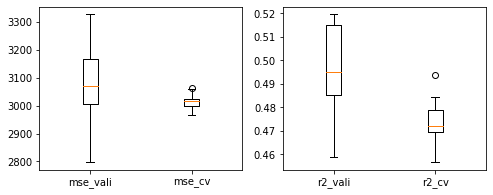

In [ ]:
mse_cv  = []
r2_cv   = []
for i in range(10):
  mse, r2 = validacaoCruzada(lr, X, y)
  mse_cv.append(mse)
  r2_cv.append(r2)

fig, axs = plt.subplots(1,2, figsize=(8, 3) )
axs[0].boxplot([mse_vali, mse_cv], labels=['mse_vali', 'mse_cv']);
axs[1].boxplot([r2_vali,  r2_cv],  labels=['r2_vali',  'r2_cv' ]);
plt.show()


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

def evaluateMse(model, X, y, printRes = True):
  pred = lr.predict(X)
  mse = mean_squared_error(y, pred)
  if (printRes):
    print("Coefficients: \n", lr.coef_)
    print("Coefficient of determination: %.2f" % r2)
  return mse

def validacaoLOO(model, X, y):
  loo = LeaveOneOut()
  mse_cv = []

  for train_idx, vali_idx in loo.split(X):    
    model.fit(X.iloc[train_idx], y[train_idx])
    mse = evaluateMse(model, X.iloc[vali_idx], y[vali_idx], printRes = False)
    mse_cv.append(mse)
  
  return np.mean(mse_cv)


mse = validacaoLOO(lr, X, y)
print('MSE=%.2f'%mse)

MSE=3001.75


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


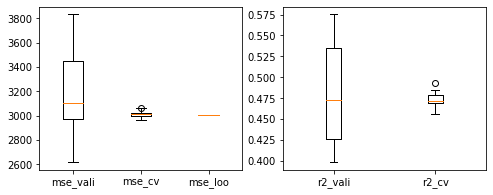

In [ ]:
mse_loo = validacaoLOO(lr, X, y) 

fig, axs = plt.subplots(1,2, figsize=(8, 3) )
axs[0].boxplot([mse_vali, mse_cv, mse_loo], labels=['mse_vali', 'mse_cv', 'mse_loo']);
axs[1].boxplot([r2_vali,  r2_cv], labels=['r2_vali',  'r2_cv',]);
plt.show()


In [ ]:
cv_results = cross_validate(lr, X, y, cv=10, scoring=('r2', 'neg_mean_squared_error'))
print(np.mean(cv_results['test_r2']))
print(np.mean(cv_results['test_neg_mean_squared_error']))

0.461962361958337
-3000.3810328390514


In [ ]:
kf = KFold(n_splits=10, shuffle=True)
cv_results = cross_validate(lr, X, y, cv=kf, scoring=('r2', 'neg_mean_squared_error'))
print(np.mean(cv_results['test_r2']))
print(np.mean(cv_results['test_neg_mean_squared_error']))

0.4565707176862346
-3041.1292253168676


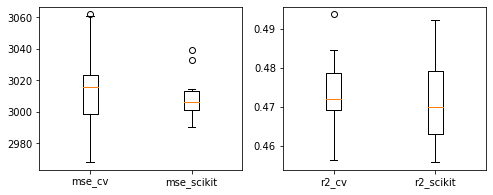

In [ ]:
mse_sk  = []
r2_sk   = []
for i in range(10):
  kf = KFold(n_splits=10, shuffle=True)
  cv_results = cross_validate(lr, X, y, cv=kf, scoring=('r2', 'neg_mean_squared_error'))
  mse, r2 = validacaoCruzada(lr, X, y)
  mse_sk.append(-np.mean(cv_results['test_neg_mean_squared_error']))
  r2_sk.append(np.mean(cv_results['test_r2']))


fig, axs = plt.subplots(1,2, figsize=(8, 3) )
axs[0].boxplot([mse_cv, mse_sk], labels=['mse_cv', 'mse_scikit']);
axs[1].boxplot([r2_cv,  r2_sk], labels=['r2_cv', 'r2_scikit']);
plt.show()

# Bootstrap


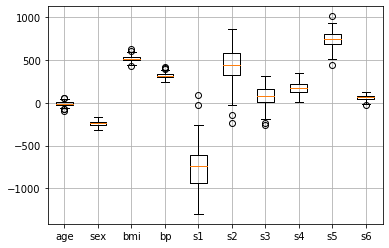

In [ ]:
coefs = []

for i in range(100):
  
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

  lr = LinearRegression()
  lr.fit(X_train, y_train)
  coefs.append(lr.coef_)

plt.boxplot(np.array(coefs), labels = X.columns);
plt.grid()
plt.show()

In [ ]:
import statsmodels.api as sm

results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.summary())
#print(results.rsquared)
print(np.sqrt(results.mse_total))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           3.83e-62
Time:                        20:43:04   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
